In [1]:
# Import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import seaborn as sns
import plotly.express as px
import string
import re
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/w

In [3]:
# Load data
data = pd.read_csv("/kaggle/input/hate-speech-offensive-tweets-by-davidson-et-al/data/labeled_data.csv")

In [4]:
# Modify data

# Count the current number of instances in class 0 and class 1
num_class_0 = data[data['class'] == 0].shape[0]
num_class_1 = data[data['class'] == 1].shape[0]

# Desired number of instances in class 0
desired_count_class_0 = 5624

# Calculate how many class 1 instances need to be changed to class 0
num_to_change = desired_count_class_0 - num_class_0

if num_to_change > 0 and num_to_change <= num_class_1:
    # Randomly select class 1 instances to change to class 0
    change_indices = random.sample(data[data['class'] == 1].index.tolist(), num_to_change)
    data.loc[change_indices, 'class'] = 0
else:
    print("Not enough class 1 instances to modify or no modification needed.")


In [5]:
print(data.shape)

(24783, 7)


# Basic Exploration

In [6]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
data.duplicated().sum()

0

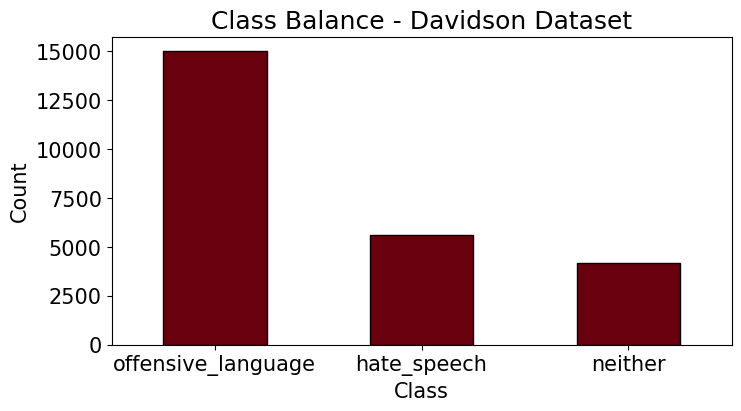

In [8]:
class_counts = data['class'].value_counts()

# Plot the class balance
plt.figure(figsize=(8, 4))
bars = class_counts.plot(kind='bar', color='#67000C', edgecolor='black')
plt.title('Class Balance - Davidson Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
tick_labels = ["offensive_language", "hate_speech", "neither"]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=0)
plt.savefig("HS_class_balance_davidson", bbox_inches='tight')
plt.show()

In [9]:
# NA data
data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

# Most frequent words and bigrams

In [10]:
def preprocess_text(text):
    """
    Preprocesses text data by performing the following steps:
    - Removes HTML tags and URLs
    - Tokenizes the text
    - Converts tokens to lowercase
    - Removes stopwords
    - Lemmatizes tokens

    Args:
        text (str): The text data to preprocess

    Returns:
        str: A preprocessed string
    """
    # Remove HTML tags and URLs
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the preprocessed tokens back into a string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

In [11]:
# Apply the preprocessing function to the 'text' column
data['tweet'] = data['tweet'].apply(preprocess_text)

In [12]:
def generate_ngrams(tweets, n):
    tokenized_tweets = [word_tokenize(tweet.lower()) for tweet in tweets]
    ngrams_list = [list(ngrams(tweet, n)) for tweet in tokenized_tweets if len(tweet) >= n]
    flattened_ngrams = [ngram for tweet in ngrams_list for ngram in tweet]
    return flattened_ngrams

## Most Frequent Words

In [31]:
n = 3

In [32]:
top_n = 20

In [33]:
y_label = {1: "Unigram", 2: "2-gram", 3: "3-gram"}

In [34]:
# # Extract the tweets from the dataset
# tweets = data['text'].tolist()

# # Generate unigrams using the generate_ngrams function
# unigrams = generate_ngrams(tweets, n)

# # Create a frequency distribution of the unigrams
# freq_dist = nltk.FreqDist(unigrams)

# # Create a frequency distribution of the unigrams
# freq_dist = nltk.FreqDist(unigrams)

# # Get the top 20 most common unigrams
# top_unigrams = freq_dist.most_common(top_n)[::-1]

# # Extract the unigram and frequency values
# unigrams, frequencies = zip(*top_unigrams)

# # Plot the top 20 unigrams
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(unigrams)), frequencies, color="red")
# plt.yticks(range(len(unigrams)), unigrams)
# plt.ylabel('Unigram')
# plt.xlabel('Frequency')
# plt.title(f'Top {top_n} {n}-grams in Hate Speech Tweets')
# plt.tight_layout()
# # plt.savefig("hateval_top20_1gram_HS")
# plt.show()

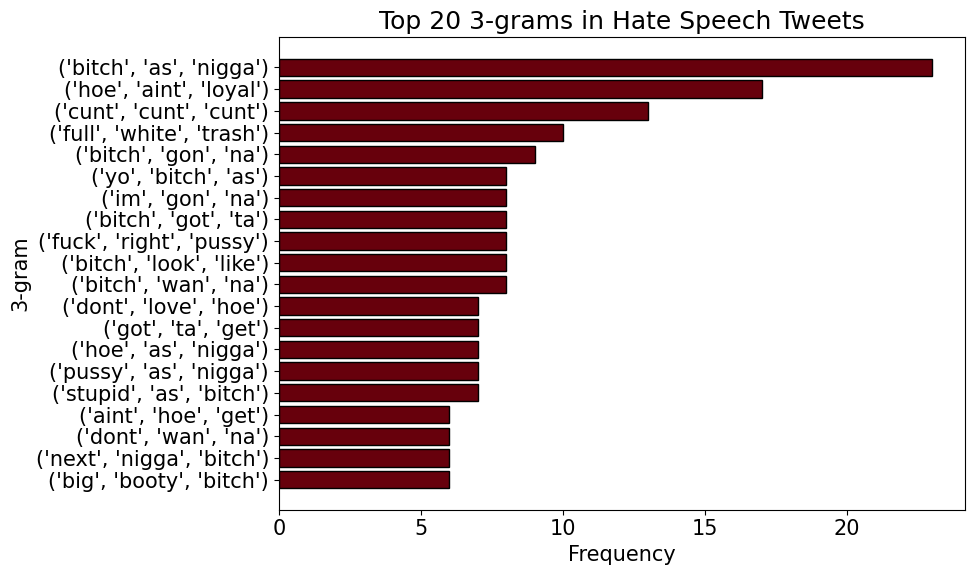

In [35]:
hs_data = data[data['class'] == 0]

# Extract the tweets from the dataset
tweets = hs_data['tweet'].tolist()

# Generate unigrams using the generate_ngrams function
unigrams = generate_ngrams(tweets, n)

# Create a frequency distribution of the unigrams
freq_dist = nltk.FreqDist(unigrams)

# Create a frequency distribution of the unigrams
freq_dist = nltk.FreqDist(unigrams)

# Get the top 20 most common unigrams
top_unigrams = freq_dist.most_common(top_n)[::-1]

# Extract the unigram and frequency values
unigrams, frequencies = zip(*top_unigrams)

# Plot the top 20 unigrams
plt.figure(figsize=(10, 6))
plt.barh(range(len(unigrams)), frequencies, color="#67000C", edgecolor='black')
plt.yticks(range(len(unigrams)), unigrams)
plt.ylabel(y_label[n])
plt.xlabel('Frequency')
plt.title(f'Top {top_n} {n}-grams in Hate Speech Tweets')
plt.tight_layout()
plt.savefig(f"davidson_top20_{n}gram_HS")
plt.show()

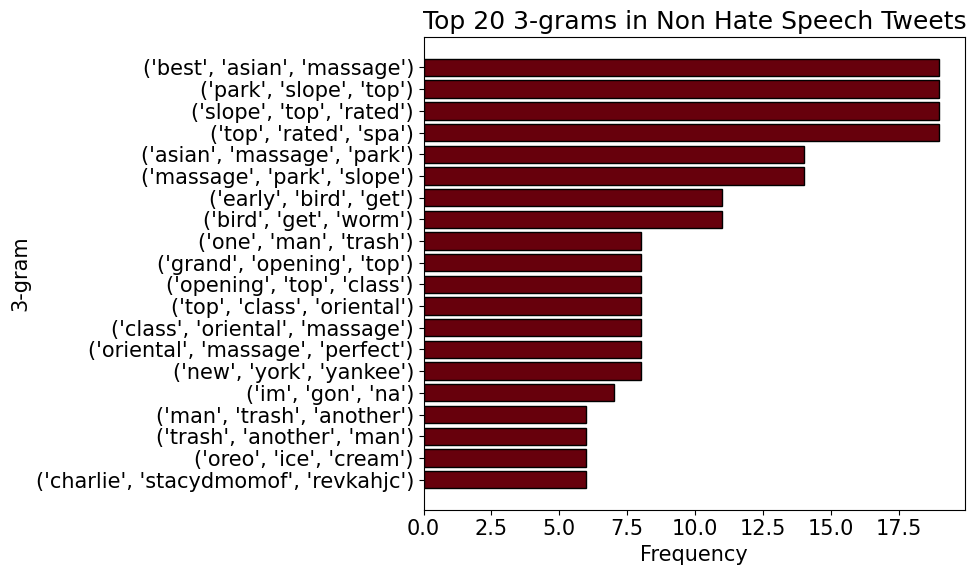

In [36]:
non_hs_data = data[data['class'] == 2]

# Extract the tweets from the dataset
tweets = non_hs_data['tweet'].tolist()

# Generate unigrams using the generate_ngrams function
unigrams = generate_ngrams(tweets, n)

# Create a frequency distribution of the unigrams
freq_dist = nltk.FreqDist(unigrams)

# Create a frequency distribution of the unigrams
freq_dist = nltk.FreqDist(unigrams)

# Get the top 20 most common unigrams
top_unigrams = freq_dist.most_common(top_n)[::-1]

# Extract the unigram and frequency values
unigrams, frequencies = zip(*top_unigrams)

# Plot the top 20 unigrams
plt.figure(figsize=(10, 6))
plt.barh(range(len(unigrams)), frequencies, color="#67000C", edgecolor='black')
plt.yticks(range(len(unigrams)), unigrams)
plt.ylabel(y_label[n])
plt.xlabel('Frequency')
plt.title(f'Top {top_n} {n}-grams in Non Hate Speech Tweets')
plt.tight_layout()
plt.savefig(f"davidson_top20_{n}gram_NHS")
plt.show()